# FastSMC minimal working example notebook

This notebook demonstrates a minimal working example of the FastSMC python bindings, where sensible default parameters are set automatically.

Please make sure you have installed the python bindings by following the instructions in `../README.md` before attempting to run this notebook.

The example dataset was simulated using the setup described in the paper, corresponding to SNP data for 150 diploid individuals and a chromosomal region of 30 Mb, with recombination rate from chromosome 2 and under a European demographic model (see https://www.biorxiv.org/content/10.1101/2020.04.20.029819v1 for more details).

1) Import `asmc` which is installed with the Python bindings

In [1]:
from asmc import *

2) Specify paths for input (example provided with this repository) and output. Input is expected to have the following files:
- `<input_files_root>.decodingQuantities.gz`
- `<input_files_root>.hap.gz`
- `<input_files_root>.map`
- `<input_files_root>.samples`

In [2]:
input_files_root = '../FILES/FASTSMC_EXAMPLE/example'
output_files_root = '../notebooks/tmp_output_minimal'

3) Create the Python FastSMC object and run it. This should only take a few seconds.

In [3]:
fast_smc = FastSMC(in_dir=input_files_root, out_dir=output_files_root)
fast_smc.run()

4) Read data, add column names and filter to remove IBD segments with low IBD score. Note that for a large analysis, loading all data into memory is unlikely to be possible. See fastsmc.ipynb for an example that reads the output line-by-line.

In [4]:
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv(output_files_root + '.1.1.FastSMC.ibd.gz', sep='\t', header=None)

data.columns = ['ind1_famid', 'ind1_id', 'ind1_hap', 'ind2_famid', 'ind2_id', 'ind2_hap', 'chromosome',
                'ibd_start', 'ibd_end', 'length_in_cM', 'ibd_score', 'post_est', 'map_est']

filtered = data[data['ibd_score'] > 0.1]
filtered

,ind1_famid,ind1_id,ind1_hap,ind2_famid,ind2_id,ind2_hap,chromosome,ibd_start,ibd_end,length_in_cM,ibd_score,post_est,map_est
0,1_94,1_94,1,1_104,1_104,1,1,8740,1660011,1.869621,0.406675,154.388000,24.999930
2,1_121,1_121,2,1_124,1_124,1,1,8740,1592010,1.711646,0.310009,260.902900,34.999920
3,1_33,1_33,1,1_127,1_127,2,1,8740,1679626,2.185055,0.411068,171.023000,24.999930
5,1_81,1_81,1,1_105,1_105,1,1,8740,1608858,1.731873,0.334969,167.744800,34.999920
6,1_35,1_35,1,1_99,1_99,2,1,8740,1660011,1.869621,0.406424,150.308700,24.999930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,1_131,1_131,1,1_135,1_135,2,1,21527883,29849472,7.540405,0.988267,26.526950,4.999943
1526,1_28,1_28,1,1_131,1_131,1,1,21527883,29849472,7.540405,0.988267,26.526950,4.999943
1530,1_43,1_43,1,1_129,1_129,2,1,20052325,29849472,9.803328,0.995904,21.177900,4.999943
1531,1_28,1_28,1,1_135,1_135,2,1,5694783,5694783,0.000000,0.327205,6986.108000,4.999943


5) Visualise data: here we simply bin the MAP age estimates and the IBD segment length

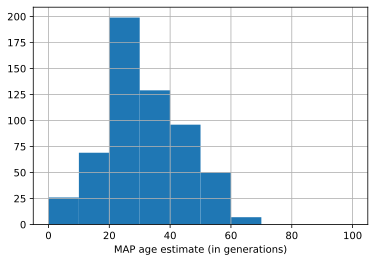

In [5]:
plt.xlabel("MAP age estimate (in generations)")
filtered['map_est'].hist(range=(0, 100))
plt.gca().set_yscale('linear')

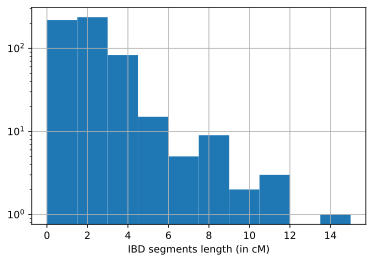

In [6]:
plt.xlabel("IBD segments length (in cM)")
filtered['length_in_cM'].hist(range=(0, 15))
plt.gca().set_yscale('log')